On commence par importer les bibliothèques nécessaires :

In [1]:
from pylab import *    # charge toutes les bibliothèques scientifiques
from numpy.random import normal    # charge la fonction de génération de distribution selon une loi normale
%matplotlib ipympl
rcParams['figure.figsize'] = [16, 8]    # pour une fenetre graphique adaptée
rcParams['font.size'] = 15    # pour un texte plus grand
rcParams['lines.markersize'] = 15    # pour des symboles plus grands
rcParams['lines.markeredgewidth'] = 2    # pour des symboles plus larges

Entrer les valeurs mesurées des grandeurs dans des tableaux, ainsi que leurs incertitudes types :

In [2]:
c = 1e-2*array([1, 2, 3, 4, 5])
uc = 1e-3
A = array([0.05, 0.1, 0.15, 0.21, 0.27])
uA = 0.01

Visualisation du graphique pour s'assurer de la cohérence des mesures :

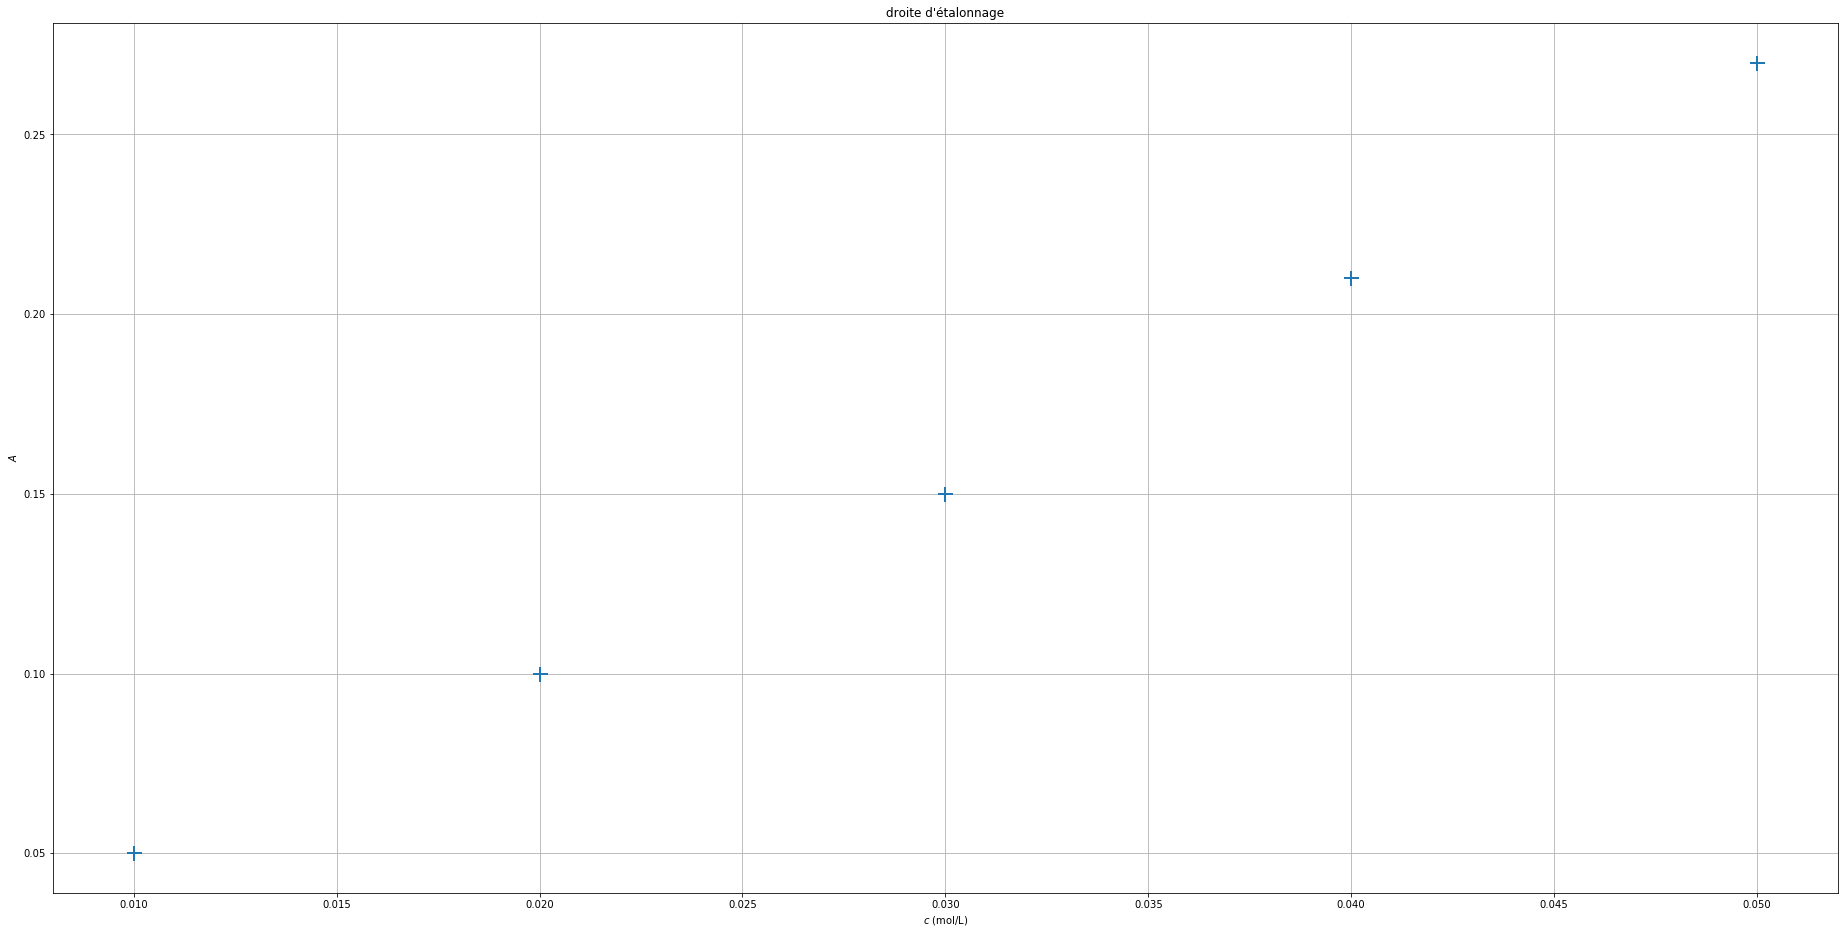

In [3]:
subplot(1, 1, 1)    # lignes, colonnes, numéro du graphique

plot(c, A, '+')    # abscisse, ordonnée, options : + o . , s points   - -- -. : lignes  b g r y m c k w couleurs

grid()    # ajoute une grille
title(r"droite d'étalonnage")    # mettre le titre désiré entre les guillemets
xlabel("$c$ (mol/L)")    # mettre le nom de l'axe des abscisses entre les guillemets
ylabel("$A$");    # mettre le nom de l'axe des ordonnées entre les guillemets. Le point-virgule final évite d'afficher un texte récapitulatif.

Tirages aléatoires de valeurs selon la méthode Monte Carlo et calcul pour chaque tirage du coefficient directeur et de l'ordonnée à l'origine pour un modèle de type $y=ax+b$ :

In [ ]:
a = []    # liste vide pour les coefficients direxteurs
b = []    # liste vide pour les ordonnées à l'origine

tirages = 100000    # nombre de simulations

for _ in range(tirages):
    calea = normal(c,uc)    # tirage aléatoire selon une loi normale
    Aalea = normal(A,uA)
    
    # Insérer ici si nécessaire les formules permettant les calculs des grandeurs en abscisse et en ordonnée :
    
    
    p = polyfit(calea ,Aalea ,1)    # calcul des coefficients du modèle
    a.append(p[0])
    b.append(p[1])

Calcul et affichage des valeurs moyennes et incertitudes-types pour le coefficient directeur et l'ordonnée à l'origine :

In [ ]:
amoy = mean(a)
bmoy = mean(b)
ua = std(a, ddof=1)
ub = std(b, ddof=1)

resultat = f"coefficient directeur : {amoy:.5} incertitude : {ua:.5} ; ordonnée à l'origine : {bmoy:.5} incertitude : {ub:.5}"
print(resultat)

Valeur mesurée :

In [ ]:
Ames = 0.13

Calcul de la valeur de la concentration et de son incertitude-type :

In [ ]:
Amesalea = normal(Ames, uA, tirages)
cmesalea = (Amesalea - array(b)) / array(a)

cmesmoy = mean(cmesalea)
ucmes = std(cmesalea, ddof=1)

resultat = f"concentration moyenne : {cmesmoy:.5} ; incertitude-type : {ucmes:.5}"
print(resultat)